### Machine Learning Strategy

### Import dependencies

In [1]:
import numpy as np
import pandas as pd

import datetime as dt
import yfinance as yf
from pandas_datareader import data as pdr

/Users/nasruddinislambinramli/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### Import plot dependencies

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [3]:
start = '2005-11-1'
end = '2024-11-1'

In [4]:
SPY =\
(
    yf
    .download('SPY', 
              start, 
              end)
    .dropna()
)

[*********************100%%**********************]  1 of 1 completed


In [5]:
SPY

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2005-11-01,120.580002,120.900002,120.220001,120.489998,83.991135,66365100
2005-11-02,120.169998,121.750000,120.129997,121.750000,84.869484,74012300
2005-11-03,122.150002,122.660004,121.750000,122.269997,85.231956,84897600
2005-11-04,122.400002,122.459999,121.550003,122.110001,85.120438,59156000
2005-11-07,122.370003,122.620003,121.849998,122.230003,85.204048,46765400
...,...,...,...,...,...,...
2024-10-25,581.510010,584.460022,578.080017,579.039978,579.039978,47268200
2024-10-28,582.580017,582.710022,580.520020,580.830017,580.830017,30174700
2024-10-29,579.849976,582.909973,578.429993,581.770020,581.770020,42899700


In [6]:
SPY['Returns'] =\
(
    SPY['Adj Close']
    .pct_change()
)

In [7]:
SPY

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2005-11-01,120.580002,120.900002,120.220001,120.489998,83.991135,66365100,NaN
2005-11-02,120.169998,121.750000,120.129997,121.750000,84.869484,74012300,0.010458
2005-11-03,122.150002,122.660004,121.750000,122.269997,85.231956,84897600,0.004271
2005-11-04,122.400002,122.459999,121.550003,122.110001,85.120438,59156000,-0.001308
2005-11-07,122.370003,122.620003,121.849998,122.230003,85.204048,46765400,0.000982
...,...,...,...,...,...,...,...
2024-10-25,581.510010,584.460022,578.080017,579.039978,579.039978,47268200,-0.000345
2024-10-28,582.580017,582.710022,580.520020,580.830017,580.830017,30174700,0.003091
2024-10-29,579.849976,582.909973,578.429993,581.770020,581.770020,42899700,0.001618


### Import X-features Data

In [8]:
stock_ticker = ["NVDA", "AAPL", "AMZN", "GOOGL"]
currency_ticker = ["DEXJPUS", "DEXUSUK"]
index_ticker = ["NASDAQCOM", "DJIA", "VIXCLS"]

In [9]:
stock_data =\
(
    yf
    .download(stock_ticker, 
              start, 
              end)
)

currency_data =\
(
    pdr
    .get_data_fred(currency_ticker, 
                   start, 
                   end)
)

index_data =\
(
    pdr
    .get_data_fred(index_ticker, 
                   start, 
                   end)
)

[*********************100%%**********************]  4 of 4 completed


In [10]:
stock_data.index = stock_data.index.tz_localize(None)

In [11]:
stock_data

Price        Adj Close                                           Close  \
Ticker            AAPL        AMZN       GOOGL        NVDA        AAPL   
Date                                                                     
2005-11-01    1.732284    2.018500    9.470544    0.253286    2.053571   
2005-11-02    1.806095    2.037500    9.478033    0.267960    2.141071   
2005-11-03    1.863336    2.078000    9.634551    0.264827    2.208929   
2005-11-04    1.842247    2.054500    9.746387    0.260317    2.183929   
2005-11-07    1.814529    2.069500    9.861218    0.259171    2.151071   
...                ...         ...         ...         ...         ...   
2024-10-25  231.155685  187.830002  165.270004  141.539993  231.410004   
2024-10-28  233.143494  188.389999  166.720001  140.520004  233.399994   
2024-10-29  233.413193  190.830002  169.679993  141.250000  233.669998   
2024-10-30  229.847122  192.729996  174.460007  139.339996  230.100006   
2024-10-31  225.661728  186.399994  171.110001  132.759995  225.910004   

Price                                                 High              ...  \
Ticker            AMZN       GOOGL        NVDA        AAPL        AMZN  ...   
Date                                                                    ...   
2005-11-01    2.018500    9.493994    0.276167    2.076429    2.037000  ...   
2005-11-02    2.037500    9.501502    0.292167    2.142857    2.061500  ...   
2005-11-03    2.078000    9.658408    0.288750    2.225714    2.100000  ...   
2005-11-04    2.054500    9.770521    0.283833    2.187143    2.090000  ...   
2005-11-07    2.069500    9.885636    0.282583    2.202500    2.073500  ...   
...                ...         ...         ...         ...         ...  ...   
2024-10-25  187.830002  165.270004  141.539993  233.220001  190.449997  ...   
2024-10-28  188.389999  166.720001  140.520004  234.729996  190.210007  ...   
2024-10-29  190.830002  169.679993  141.250000  234.330002  191.460007  ...   
2024-10-30  192.729996  174.460007  139.339996  233.470001  195.610001  ...   
2024-10-31  186.399994  171.110001  132.759995  229.830002  190.600006  ...   

Price              Low                    Open                          \
Ticker           GOOGL        NVDA        AAPL        AMZN       GOOGL   
Date                                                                     
2005-11-01    9.234484    0.274000    2.044286    1.998500    9.305806   
2005-11-02    9.438689    0.275000    2.061429    2.014500    9.552052   
2005-11-03    9.544044    0.286417    2.152143    2.044500    9.569820   
2005-11-04    9.645896    0.280833    2.155357    2.074500    9.759259   
2005-11-07    9.813564    0.281417    2.173214    2.054000    9.887387   
...                ...         ...         ...         ...         ...   
2024-10-25  163.419998  140.800003  229.740005  187.850006  163.669998   
2024-10-28  163.949997  140.050003  233.320007  189.570007  168.750000   
2024-10-29  167.089996  138.899994  233.100006  188.580002  167.729996   
2024-10-30  174.059998  136.809998  232.610001  194.699997  180.679993   
2024-10-31  171.000000  132.110001  229.339996  190.509995  173.130005   

Price                      Volume                                   
Ticker            NVDA       AAPL       AMZN      GOOGL       NVDA  
Date                                                                
2005-11-01    0.279583  749686000  107660000  653589756  400488000  
2005-11-02    0.276250  857060400   97236000  422193384  523668000  
2005-11-03    0.294167  884382800  140000000  297638064  465072000  
2005-11-04    0.288917  878035200   88908000  352643004  570276000  
2005-11-07    0.285333  638831200   67722000  383276340  370824000  
...                ...        ...        ...        ...        ...  
2024-10-25  140.929993   38802300   29362100   19828900  205122100  
2024-10-28  143.000000   36087100   27930800   32138600  173586700  
2024-10-29  140.289993   35417200   35690200   42169000  157

### Outcome (Y)

In [12]:
return_period = 5

In [13]:
Y =\
    (np
     .log(SPY['Adj Close'])
     .diff(return_period)
     .shift(-return_period)
    )

Y

Date
2005-11-01    0.014338
2005-11-02    0.005243
2005-11-03    0.008713
2005-11-04    0.013422
2005-11-07    0.011874
                ...   
2024-10-25         NaN
2024-10-28         NaN
2024-10-29         NaN
2024-10-30         NaN
2024-10-31         NaN
Name: Adj Close, Length: 4782, dtype: float64

In [14]:
Y.name =\
    ("SPY"
     +
     "_pred")

Y.tail(20)

Date
2024-10-04    0.011453
2024-10-07    0.028680
2024-10-08    0.011466
2024-10-09    0.008901
2024-10-10    0.010738
2024-10-11    0.008607
2024-10-14   -0.001182
2024-10-15    0.006087
2024-10-16   -0.007429
2024-10-17   -0.005355
2024-10-18   -0.009539
2024-10-21   -0.004809
2024-10-22   -0.002661
2024-10-23    0.003489
2024-10-24   -0.018469
2024-10-25         NaN
2024-10-28         NaN
2024-10-29         NaN
2024-10-30         NaN
2024-10-31         NaN
Name: SPY_pred, dtype: float64

### Input Features (Xs)

In [15]:
# X1 = lagged five-day log returns of stocks (META, APPLE, AMZN, GOOGL);

X1 =\
    (np.
     log(stock_data.loc[ : , ("Adj Close", ("NVDA", "AAPL", "AMZN", "GOOGL")
                             )
                       ]
        )
     .diff(return_period) # return_period = 5 (defined previously)
    )

X1.columns =\
    (X1
     .columns
     .droplevel()
    )

X1.dropna()

Ticker,NVDA,AAPL,AMZN,GOOGL
Date,,,,
2005-11-08,0.004213,0.040892,0.038391,0.027352
2005-11-09,-0.008020,0.002665,0.015825,-0.001397
2005-11-10,-0.034052,-0.010892,0.014808,0.013256
2005-11-11,-0.000585,0.006357,0.037966,-0.000077
2005-11-14,0.024760,0.020054,0.027170,0.004899
...,...,...,...,...
2024-10-25,0.025329,-0.015394,-0.006157,0.011257
2024-10-28,-0.022448,-0.013110,-0.003603,0.016023
2024-10-29,-0.016431,-0.009329,0.005939,0.027121


In [16]:
# X2 = lagged 5-day log returns of currency exchange rates (USD/JPY and GBP/USD)

X2 =\
    (np
     .log(currency_data)
     .diff(return_period)
    )

X2.dropna()

,DEXJPUS,DEXUSUK
DATE,,
2005-11-08,0.004022,-0.012270
2005-11-09,0.006403,-0.019335
2005-11-10,0.007141,-0.014667
2005-11-14,0.011081,-0.005232
2005-11-15,0.015507,-0.002818
...,...,...
2024-10-28,0.018046,0.000077
2024-10-29,0.015497,0.002772
2024-10-30,0.002223,0.005240


In [17]:
X3 =\
    (np
     .log(index_data.loc[ : , ("NASDAQCOM", "VIXCLS")]
         )
     .diff(return_period)
    )

X3.dropna()

,NASDAQCOM,VIXCLS
DATE,,
2005-11-08,0.027075,-0.126916
2005-11-09,0.014583,-0.051762
2005-11-10,0.016737,-0.088411
2005-11-11,0.015115,-0.124354
2005-11-14,0.010372,-0.072817
...,...,...
2024-10-28,0.001465,0.074963
2024-10-29,0.007489,0.060754
2024-10-30,0.017964,0.056089


In [18]:
# X4 = lagged five-day, 15-day, 30-day, and 60-day log returns of NFLX.

X4 =\
    (
    pd
    .concat([np
             .log(SPY['Adj Close'])
             .diff(i) for i in [return_period,               # Lag 5 days
                                return_period * 3,           # Lag 5*3 = 15 days
                                return_period * 6,           # Lag 5*6 = 30 days
                                return_period * 12]          # Lag 5*12 = 60 days
            ],
           axis = 1  # concat along columns
           )
    .dropna()
)

X4.columns = ["SPY_DT", "SPY_3DT", "SPY_6DT", "SPY_12DT"]

X4.dropna()

,SPY_DT,SPY_3DT,SPY_6DT,SPY_12DT
Date,,,,
2006-01-30,0.015852,0.000000,0.010205,0.069182
2006-01-31,0.007479,-0.009911,0.005757,0.051433
2006-02-01,0.013566,-0.003964,0.015937,0.054127
2006-02-02,-0.003618,-0.018813,0.009421,0.043764
2006-02-03,-0.017818,-0.019838,0.003491,0.037805
...,...,...,...,...
2024-10-25,-0.009539,0.010521,0.032914,0.067306
2024-10-28,-0.004809,0.022689,0.034525,0.089187
2024-10-29,-0.002661,0.014893,0.035734,0.120360


### Technical Indicators

In [19]:
# X5 = 21-day, 63-day, and 252-day moving averages (SMA)

X5 = (pd.concat(
    [
        SPY['Adj Close'].ffill().rolling(window=21).mean(),
        SPY['Adj Close'].ffill().rolling(window=63).mean(),
        SPY['Adj Close'].ffill().rolling(window=252).mean()
    ], axis=1)
      .dropna()
     )

X5.columns = ['SMA_21', 'SMA_63', 'SMA_252']

X5.dropna()

,SMA_21,SMA_63,SMA_252
Date,,,
2006-10-31,96.879154,93.879820,90.534139
2006-11-01,96.997450,93.981243,90.586319
2006-11-02,97.060318,94.084233,90.634788
2006-11-03,97.106285,94.187884,90.681142
2006-11-06,97.210048,94.314382,90.732277
...,...,...,...
2024-10-25,576.851903,559.400244,512.867443
2024-10-28,577.297619,560.042902,513.557064
2024-10-29,577.679048,560.561066,514.257736


In [20]:
# X6 = 10-day, 30-day, and 200-day exponential moving averages (EMA)

# EMA function from lecture 9 notes
def EMA(df, n):
    EMA = pd.Series(df
                    .ffill()
                    .ewm(span = n, # controls the rate of decay for exponential weighting
                         min_periods = n)
                    .mean(),
                    name = "EMA_" + str(n)
                    )
    return EMA

X6 = (pd.concat(
    [
        EMA(SPY['Adj Close'], period) for period in [10, 30, 200]

    ], axis=1)
      .dropna()
      )

X6.dropna()

,EMA_10,EMA_30,EMA_200
Date,,,
2006-08-17,90.664635,89.918998,89.720373
2006-08-18,90.971958,90.076154,89.750643
2006-08-21,91.151445,90.197637,89.775979
2006-08-22,91.297018,90.310828,89.800906
2006-08-23,91.369866,90.400303,89.822600
...,...,...,...
2024-10-25,579.861047,573.350296,529.230062
2024-10-28,580.037223,573.832858,529.743495
2024-10-29,580.352277,574.344933,530.261171


In [21]:
# X7 = 10-day, 30-day, and 200-day relative strength index (RSI)

def RSI(series, period):

    delta = series.diff().ffill() # daily price change

    u = delta * 0 # to separate u for gains and d for losses
    d = u.copy()

    u[delta > 0] = delta[delta > 0]
    d[delta < 0] = -delta[delta < 0]

    # Initialize avg gain and loss --> assigned to the n-period index
    u[u.index[period - 1]] = np.mean( u[:period] ) # average gain

    u = u.drop(u.index[:(period - 1)
                      ]
              )

    d[d.index[period - 1]] = np.mean( d[:period] ) # average loss

    d = d.drop(d.index[:(period - 1)
                      ]
              )

# com = center of mass --> controls the decay of weighting in EWMA (higher com = slower decay)
    rs = u.ewm(com = period - 1, adjust = False).mean() / \
         d.ewm(com = period - 1, adjust = False).mean()

    return 100 - 100 / (1 + rs)



X7 = (pd.concat(
    [
        RSI(SPY['Adj Close'], 10), #10-day RSI
        RSI(SPY['Adj Close'], 30), #30-day RSI
        RSI(SPY['Adj Close'], 200), #200-day RSI
    ], axis=1)
    .dropna()
)

X7.columns = ["RSI_10", "RSI_30", "RSI_200"]

X7.dropna()

,RSI_10,RSI_30,RSI_200
Date,,,
2006-08-17,70.782697,57.350608,54.333593
2006-08-18,73.830975,58.651643,54.566169
2006-08-21,67.219085,57.122090,54.330205
2006-08-22,67.100286,57.094684,54.326004
2006-08-23,62.655235,56.088945,54.173907
...,...,...,...
2024-10-25,54.255905,58.171986,56.927951
2024-10-28,57.781985,58.994696,57.052058
2024-10-29,59.599059,59.428201,57.117270


In [22]:
def STOK(df, n):

    close = df["Adj Close"]
    low = df["Low"]
    high = df["High"]

    STOK = ((close - low.rolling(n).min()) / \
            (high.rolling(n).max() - low.rolling(n).min()
            )
           ) * 100
    return STOK

def STOD(df, n):

    close = df["Adj Close"]
    low = df["Low"]
    high = df["High"]

    STOK = ((close - low.rolling(n).min()) / \
            (high.rolling(n).max() - low.rolling(n).min()
            )
           ) * 100

    STOD = STOK.rolling(3).mean()
    return STOD

X8 = pd.concat(
    [
        STOK(SPY, 10),
        STOK(SPY, 30),
        STOK(SPY, 200),
        STOD(SPY, 10),
        STOD(SPY, 30),
        STOD(SPY, 200),
    ], axis=1)\
    .dropna()

X8.columns = ["STOK_10", "STOK_30", "STOK_200", "STOD_10", "STOD_30", "STOD_200"]

X8.dropna()

,STOK_10,STOK_30,STOK_200,STOD_10,STOD_30,STOD_200
Date,,,,,,
2006-08-21,-778.250189,-366.636762,-263.029921,-796.131684,-370.243299,-235.049900
2006-08-22,-778.409869,-366.721604,-263.092516,-775.311923,-365.075586,-248.447212
2006-08-23,-784.178794,-369.786781,-271.966574,-780.279617,-367.715049,-266.029670
2006-08-24,-808.605064,-370.723266,-272.669997,-790.397909,-369.077217,-269.243029
2006-08-25,-933.340821,-369.361190,-271.646899,-842.041560,-369.957079,-272.094490
...,...,...,...,...,...,...
2024-10-25,39.487097,72.997616,93.909663,37.065516,74.281631,93.665942
2024-10-28,54.786560,79.115774,95.449481,45.156752,75.438860,94.480287
2024-10-29,62.820760,82.799607,96.258086,52.364806,78.304332,95.205743


In [23]:
def ROC(df, n):
    M = df.diff(n - 1)
    N = df.shift(n - 1)
    ROC = pd.Series((M / N) * 100,
                    name = "ROC_" + str(n)
                    )
    return ROC

X9 = pd.concat(
    [
        ROC(SPY['Adj Close'], 10),
        ROC(SPY['Adj Close'], 30),

    ], axis=1)\
    .dropna()

X9.dropna()

,ROC_10,ROC_30
Date,,
2005-12-13,1.514982,5.660200
2005-12-14,0.884015,4.977340
2005-12-15,0.465160,4.228358
2005-12-16,0.355407,4.029020
2005-12-19,-0.349764,3.392314
...,...,...
2024-10-25,-0.903619,3.193812
2024-10-28,0.181101,3.470540
2024-10-29,-0.091013,3.946280


In [24]:
# MACD
def MACD(data , column):
    ema_12 = data[column].ewm(span = 12, min_periods = 12).mean()
    ema_26 = data[column].ewm(span = 26, min_periods = 26).mean()

    macd = ema_12 - ema_26
    macd_signal =\
        (
            macd
            .ewm(span = 9)
            .mean()
        )
    return macd , macd_signal

SPY['MACD_Line'], SPY['Signal_Line'] = MACD(SPY , 'Adj Close')

# Bollinger Bands
SPY['MiddleBand'] = SPY['Adj Close'].rolling(window=20).mean()
SPY['StdDev'] = SPY['Adj Close'].rolling(window=20).std()
SPY['BB_High'] = SPY['MiddleBand'] + (SPY['StdDev'] * 2)
SPY['BB_Low'] = SPY['MiddleBand'] - (SPY['StdDev'] * 2)
SPY['%B'] = (SPY['Adj Close'] - SPY['BB_Low']) / (SPY['BB_High'] - SPY['BB_Low'])
SPY['Band_Width'] = SPY['BB_High'] - SPY['BB_Low']
SPY['Band_Position'] = (SPY['Adj Close'] - SPY['MiddleBand']) / SPY['Band_Width']

# Volatility
SPY['Volatility'] = SPY['Returns'].rolling(window=20).std()

X10 = pd.concat(
    [
        SPY['MACD_Line'],
        SPY['Signal_Line'],
        SPY['%B'],
        SPY['Band_Width'],
        SPY['Band_Position'],
        SPY['Volatility']

    ], axis=1)\
    .dropna()

X10.columns = ['MACD_Line', 'Signal_Line', '%B', 'Band_Width', 'Band_Position', 'Volatility']

X10.dropna()

,MACD_Line,Signal_Line,%B,Band_Width,Band_Position,Volatility
Date,,,,,,
2005-12-07,0.434026,0.434026,0.623960,4.203622,0.123960,0.004871
2005-12-08,0.393028,0.411249,0.590590,3.747421,0.090590,0.004895
2005-12-09,0.372931,0.395545,0.633214,3.493016,0.133214,0.004677
2005-12-12,0.358941,0.383145,0.638342,3.290254,0.138342,0.004649
2005-12-13,0.387394,0.384409,0.798464,3.110897,0.298464,0.004800
...,...,...,...,...,...,...
2024-10-25,4.664377,5.493270,0.583743,22.915026,0.083743,0.005998
2024-10-28,4.432248,5.281066,0.646438,22.914316,0.146438,0.005975
2024-10-29,4.274857,5.079824,0.668293,21.617124,0.168293,0.005533


In [25]:
X=\
(
    pd
    .concat([X8, X9, X10],
            axis = 1)
)

X =\
(
    X.ffill()
)

In [26]:
data =\
(
  pd.concat([Y, X],axis = 1)
    #.fillna(method='ffill')
    .dropna()
    .iloc[ : :1, :]
)

Y =\
(
    data
    .loc[ : ,
         Y.name]
)


X = data.loc[ : , X.columns]


### Exploratory Data Analysis (EDA)

In [27]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SPY_pred,4576.0,0.002011,0.025098,-0.220564,-0.008211,0.004260,0.015023,0.177339
STOK_10,4576.0,-349.989021,323.699380,-2053.778024,-531.457772,-308.168402,-80.859844,95.900232
STOK_30,4576.0,-153.794312,168.810884,-1203.378555,-259.283674,-136.163637,-17.017359,98.510564
STOK_200,4576.0,-0.854123,60.771856,-291.934072,-25.786100,1.626847,37.715273,99.487772
STOD_10,4576.0,-350.170572,319.140568,-2013.008530,-531.922024,-315.679976,-82.353216,95.309349
STOD_30,4576.0,-153.891195,168.077213,-1197.004736,-258.626846,-137.131520,-17.016107,97.515924
STOD_200,4576.0,-0.922779,60.753791,-289.974817,-25.677364,1.458335,37.787704,99.136481
ROC_10,4576.0,0.418570,3.191405,-24.948268,-0.929516,0.744288,2.123846,16.177270
ROC_30,4576.0,1.341931,5.522086,-32.992412,-1.066518,2.102482,4.537573,27.253682
MACD_Line,4576.0,0.735397,2.713025,-21.941911,-0.263952,0.804059,1.720317,9.088346


### Supervised Machine Learning

In [28]:
validation_size = 0.2

train_size =\
    int(len(X)
        *
        (1 - validation_size)
       )

X_train, X_test =\
    (X[0         :train_size],
     X[train_size:len(X)    ]
    )

Y_train, Y_test =\
    (Y[0         :train_size],
     Y[train_size:len(X)    ]
    )

### Fitting: Model Comparison with ML Algorithms

Step 3. For your algorithm of choices, please assess the model performance of the following algorithms:

* Linear Regression
* Elastic Net
* LASSO
* Support Vector Machine
* K-Nearest Neighbor
* ARIMA
* Decision Tree
* Extra Trees
* Random Forest
* Gradient Boosting Tree
* Adaptive Boosting

### Import Machine Learning Dependencies

In [29]:
# Loading Algorithm

from sklearn.linear_model import LinearRegression

# Regularization
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

# Decision Tree
from sklearn.tree import DecisionTreeRegressor

# ENSEMBLE

## Bagging
from sklearn.ensemble import RandomForestRegressor #imputation of missing value
from sklearn.ensemble import ExtraTreesRegressor

## Boosting
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Support Vector Machine
from sklearn.svm import SVR

# K-Nearest Neighbor
from sklearn.neighbors import KNeighborsRegressor

# Multi-layer Perceptron (Neural Networks)
from sklearn.neural_network import MLPRegressor

# ARIMA
from statsmodels.tsa.arima.model import ARIMA

In [30]:
# for data split
from sklearn.model_selection import train_test_split

# for cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# for assessment
from sklearn.metrics import mean_squared_error

# for Feature Selection
from sklearn.feature_selection import chi2, f_regression
from sklearn.feature_selection import SelectKBest

In [31]:
import statsmodels.tsa.arima.model as stats
import statsmodels.api as sm

In [32]:
from pandas.plotting import scatter_matrix

# for Pre-processing (Feature Engineering)
from sklearn.preprocessing import StandardScaler

# assumption checks for Time-Series
from statsmodels.graphics.tsaplots import plot_acf

In [33]:
models = []

# Regression and tree regression algorithms
models.append(("LinearRegression", LinearRegression()))
models.append(("ElasticNet", ElasticNet()))
models.append(("LASSO", Lasso()))
models.append(("SupportVectorMachine", SVR()))
models.append(("KNN", KNeighborsRegressor()))
models.append(("DecisionTreeR", DecisionTreeRegressor()))

# Bagging (Boostrap Aggregation)
models.append(("ExtraTreesR", ExtraTreesRegressor()))
models.append(("RandomForestR", RandomForestRegressor()))
models.append(("GradientBoostR", GradientBoostingRegressor()))
models.append(("AdaBoostR", AdaBoostRegressor()))

### Comparison of Machine Learning Models

In [34]:
### Initialization of Lists:

names = [] # store the names of the models,

# kfold_results = [] # store the cross-validation results,

train_results = [] # store the performance of the models on the training dataset
test_results = [] # store the performance of the models on the test dataset


### Looping through Models:

for name, model in models:

### Appending Model Names:

    names.append(name)

### Let's run K-fold Cross-Validation

    # kfold =\
    #     (KFold(n_splits = num_folds,
    #            random_state = seed,
    #            shuffle = True)
    #     )

# A KFold object is created with a specified number of splits (num_folds),
# a random seed (seed),
# and shuffling enabled.

### Running Cross-Validation:
# Let's convert MSE to positive (Here, now it becomes lower the better; See below)

    # cv_results =\
    #     (
    #      -1
    #      *
    #      cross_val_score(model, X_train, Y_train,
    #                      cv = kfold,
    #                      scoring = scoring)
    #     )

# Cross-validation is performed on the training data (X_train, Y_train) using the current model.
# The negative mean squared error is used
# as the scoring metric
# (hence multiplied by -1 to make it positive,
# as the convention is that higher scores are better).

# Storing Cross-Validation Results:

### The cross-validation results for the current model are appended to the kfold_results list.

    #kfold_results.append(cv_results)

# Fitting the Model on the Entire Training Set:

    res = model.fit(X_train, Y_train) # The model is trained on the entire training dataset.

### Evaluating Model on Training Set:

# The trained model’s predictions on the training set are evaluated
# using the mean squared error, and the result is appended to train_results.

    train_result = mean_squared_error(res.predict(X_train), Y_train)

    train_results.append(train_result)

## Evaluating Model on Testing Set:

# Similarly, the model’s performance is evaluated
# on the testing set and appended to test_results.

    test_result = mean_squared_error(res.predict(X_test), Y_test)

    test_results.append(test_result)

# Printing the Results:

# The name of the model,
# the average cross-validation score,
# the standard deviation of the cross-validation scores,
# the training set performance,
# and the testing set performance are printed out.

    # message = "%s: %f (%f) %f %f" % (name, cv_results.mean(),
    #                                  cv_results.std(),
    #                                  train_result,
    #                                  test_result)
    # print(message)

# Model performance comparison (MSE)
model_results = pd.DataFrame({
    "Model": names,
    "Train_MSE": [round(x, 4) for x in train_results],
    "Test_MSE": test_results
})


model_results.set_index("Model", inplace=True)

model_results


,Train_MSE,Test_MSE
Model,,
LinearRegression,0.0006,0.000527
ElasticNet,0.0007,0.000511
LASSO,0.0007,0.000511
SupportVectorMachine,0.0021,0.000975
KNN,0.0004,0.001284
DecisionTreeR,0.0000,0.001992
ExtraTreesR,0.0000,0.001034
RandomForestR,0.0001,0.001014
GradientBoostR,0.0004,0.000900


### Time-Series based Model (ARIMA)

In [35]:
X_train_ARIMA =\
    (X_train
     .loc[ : , [#"NVDA", "AAPL", "AMZN", "GOOGL",
                #"DEXJPUS", "DEXUSUK", 
                #"NASDAQCOM", "VIXCLS",
                #'SPY_DT', 'SPY_3DT', 'SPY_6DT', 'SPY_12DT', 
                #'SMA_21', 'SMA_63', 'SMA_252', 
                #'EMA_10', 'EMA_30', 'EMA_200', 
                #'RSI_10', 'RSI_30', 'RSI_200', 
                'STOK_10', 'STOK_30', 'STOK_200','STOD_10', 'STOD_30', 'STOD_200', 
                'ROC_10', 'ROC_30',
                'MACD_Line', 'Signal_Line', '%B', 'Band_Width', 'Band_Position', 'Volatility']])

X_test_ARIMA =\
    (X_test
    .loc[ : , [#"NVDA", "AAPL", "AMZN", "GOOGL",
               #"DEXJPUS", "DEXUSUK", 
               #"NASDAQCOM", "VIXCLS",
               #'SPY_DT', 'SPY_3DT','SPY_6DT', 'SPY_12DT', 
               #'SMA_21', 'SMA_63', 'SMA_252', 
               #'EMA_10','EMA_30', 'EMA_200', 
               #'RSI_10', 'RSI_30', 'RSI_200', 
               'STOK_10','STOK_30', 'STOK_200','STOD_10', 'STOD_30', 'STOD_200',
               'ROC_10','ROC_30', 
               'MACD_Line', 'Signal_Line', '%B', 'Band_Width', 'Band_Position' ,'Volatility']])

train_len = len(X_train_ARIMA)
test_len = len(X_test_ARIMA)
total_len = len(X)

### Hyperparameter Tuning

In [36]:
def assess_ARIMA_model(arima_order):

    modelARIMA = stats.ARIMA(endog = Y_train,
                             exog = X_train_ARIMA,
                             order = arima_order)
    # Our model takes an arima_order as input,
    # fits an ARIMA model to the training data Y_train
    # with exogenous variables X_train_ARIMA,

    model_fit = modelARIMA.fit()
    # and then calculates

    error = mean_squared_error(Y_train,
                               model_fit.fittedvalues)

    # and returns the Mean Squared Error (MSE)
    # between the true and the fitted values.

    return error

def assess_models(p_values, d_values, q_values):

    # Team, our function performs grid search
    # over all combinations of provided p, d, and q values.

    # For each combination, it calculates the MSE and prints it.

    # If the MSE for the current combination
    # is less than the best score encountered so far,
    # it updates the best score and the corresponding configuration.

    # At the end of the grid search,
    # it prints the best configuration and its MSE.

    best_score, best_cfg = float("inf"), None

    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p, d, q)
                try:
                    mse = assess_ARIMA_model(order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order

                    print("ARIMA%s MSE = %.7f" % (order, mse)
                          )

                except:
                    continue
    print("Best ARIMA%s MSE = %.7f" % (best_cfg, best_score)
          )

# parameters to use for assessment

# Recall that the ARIMA model
# is characterized by three parameters:
# (p, d, q) which stand for the order of autoregression,
# the degree of differencing,
# and the order of the moving average, respectively.

p_values = [0, 1, 2]
d_values = range(0, 2)
q_values = range(0, 2)

In [37]:
assess_models(p_values, d_values, q_values)

/Users/nasruddinislambinramli/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nasruddinislambinramli/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nasruddinislambinramli/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nasruddinislambinramli/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to c

ARIMA(0, 0, 0) MSE = 0.0021944


/Users/nasruddinislambinramli/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nasruddinislambinramli/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nasruddinislambinramli/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nasruddinislambinramli/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to c

ARIMA(0, 0, 1) MSE = 0.0004703


/Users/nasruddinislambinramli/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nasruddinislambinramli/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nasruddinislambinramli/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nasruddinislambinramli/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to c

ARIMA(0, 1, 0) MSE = 0.0002071


/Users/nasruddinislambinramli/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nasruddinislambinramli/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nasruddinislambinramli/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nasruddinislambinramli/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to c

ARIMA(0, 1, 1) MSE = 0.0002056


/Users/nasruddinislambinramli/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nasruddinislambinramli/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nasruddinislambinramli/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 0, 0) MSE = 0.0002283


/Users/nasruddinislambinramli/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nasruddinislambinramli/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nasruddinislambinramli/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 0, 1) MSE = 0.0002287


/Users/nasruddinislambinramli/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nasruddinislambinramli/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nasruddinislambinramli/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nasruddinislambinramli/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to c

ARIMA(1, 1, 0) MSE = 0.0002057


/Users/nasruddinislambinramli/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nasruddinislambinramli/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nasruddinislambinramli/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nasruddinislambinramli/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to c

ARIMA(1, 1, 1) MSE = 0.0002056


/Users/nasruddinislambinramli/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nasruddinislambinramli/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nasruddinislambinramli/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 0, 0) MSE = 0.0002668


/Users/nasruddinislambinramli/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nasruddinislambinramli/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nasruddinislambinramli/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nasruddinislambinramli/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive

ARIMA(2, 0, 1) MSE = 0.0006491


/Users/nasruddinislambinramli/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nasruddinislambinramli/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nasruddinislambinramli/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nasruddinislambinramli/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to c

ARIMA(2, 1, 0) MSE = 0.0002053


/Users/nasruddinislambinramli/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nasruddinislambinramli/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nasruddinislambinramli/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nasruddinislambinramli/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive

ARIMA(2, 1, 1) MSE = 0.0002071
Best ARIMA(2, 1, 0) MSE = 0.0002053


In [38]:
modelARIMA =\
(
    stats
     .ARIMA(endog = Y_train,
                exog = X_train_ARIMA,
                order = [1, 0, 0] #best arima order result
            )
)

model_fit = modelARIMA.fit()

/Users/nasruddinislambinramli/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nasruddinislambinramli/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nasruddinislambinramli/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [39]:
error_training_ARIMA =\
(    mean_squared_error(Y_train,
                       model_fit.fittedvalues)
)

predicted =\
(
    model_fit
    .predict(start = train_len - 1,
             end = total_len - 1,
             exog = X_test_ARIMA)[1: ]
)

/Users/nasruddinislambinramli/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/nasruddinislambinramli/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [40]:
error_testing_ARIMA =\
(    mean_squared_error(Y_test,
                        predicted)
)

error_testing_ARIMA

0.0006745428114671496

In [41]:
test_results.append(error_testing_ARIMA)

train_results.append(error_training_ARIMA)

names.append("ARIMA")

### Comparison Model

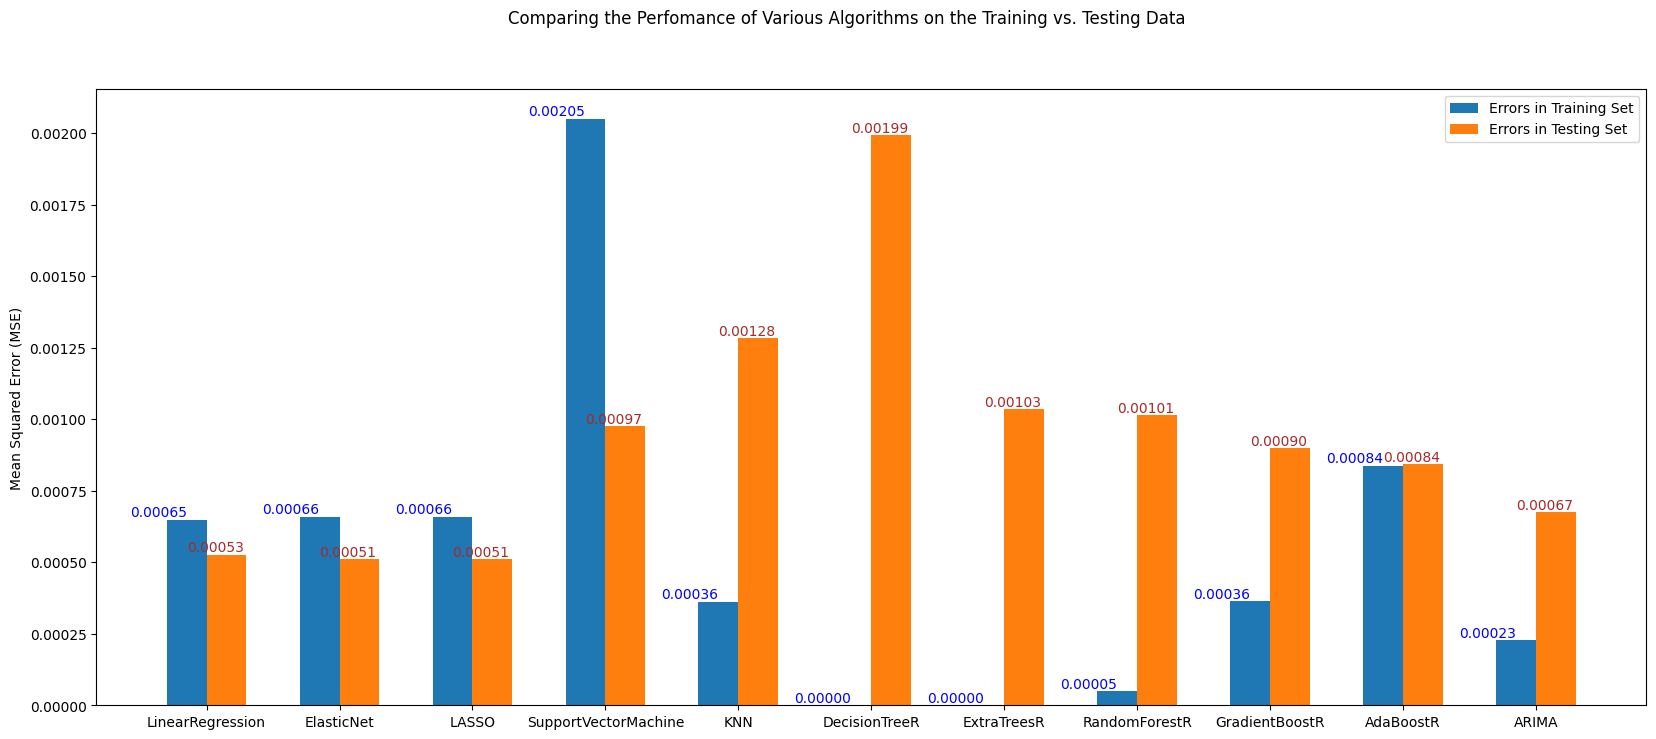

In [42]:
fig = plt.figure(figsize = [20, 8])

ind = np.arange(len(names)
               )

width = 0.30

fig.suptitle("Comparing the Perfomance of Various Algorithms on the Training vs. Testing Data")

ax = fig.add_subplot(111)

train_bars = (plt
 .bar(ind - width/2,
      train_results,
      width = width,
      label = "Errors in Training Set")
)

test_bars = (plt
 .bar(ind + width/2,
      test_results,
      width = width,
      label = "Errors in Testing Set")
)

plt.legend()

ax.set_xticks(ind)
ax.set_xticklabels(names)

plt.ylabel("Mean Squared Error (MSE)")

# Add y-axis values on top of each bar
for bar, train_result, test_result in zip(train_bars, train_results, test_results):
    ax.text(bar.get_x() + bar.get_width() / 2, train_result, f'{train_result:.5f}', ha='right', va='bottom', fontsize=10,color='blue')
    ax.text(bar.get_x() + bar.get_width() / 2, test_result, f'{test_result:.5f}', ha='left', va='bottom', fontsize=10, color='brown')


plt.show()

In [43]:
# AdaBoostRegressor
ABR_model = AdaBoostRegressor()
ABR_model.fit(X_train, Y_train)
Predicted_ABR = ABR_model.predict(X_test)
ABR_Predictions = pd.DataFrame({'Predicted': Predicted_ABR}, index=Y_test.index)

# Elastic Net
EN_model = ElasticNet()
EN_model.fit(X_train, Y_train)
Predicted_EN = EN_model.predict(X_test)
EN_Predictions = pd.DataFrame({'Predicted': Predicted_EN}, index=Y_test.index)


# LASSO
LASSO_model = Lasso()
LASSO_model.fit(X_train, Y_train)
Predicted_LASSO = LASSO_model.predict(X_test)
LASSO_Predictions = pd.DataFrame({'Predicted': Predicted_LASSO}, index=Y_test.index)

# # SVM
# SVM_model = SVR()
# SVM_model.fit(X_train, Y_train)
# Predicted_SVM = SVM_model.predict(X_test)
# SVM_Predictions = pd.DataFrame({'Predicted': Predicted_SVM}, index=Y_test.index)

In [44]:
# # CART
# CART_model = DecisionTreeRegressor()
# CART_model.fit(X_train, Y_train)
# Predicted_CART = CART_model.predict(X_test)
# CART_Predictions = pd.DataFrame({'Predicted': Predicted_CART}, index=Y_test.index)

# GBR
GBR_model = GradientBoostingRegressor()
GBR_model.fit(X_train, Y_train)
Predicted_GBR = GBR_model.predict(X_test)
GBR_Predictions = pd.DataFrame({'Predicted': Predicted_GBR}, index=Y_test.index)

# # RFR
# RFR_model = RandomForestRegressor()
# RFR_model.fit(X_train, Y_train)
# Predicted_RFR = RFR_model.predict(X_test)
# RFR_Predictions = pd.DataFrame({'Predicted': Predicted_RFR}, index=Y_test.index)

#Linear Regression
LN_model = LinearRegression()
LN_model.fit(X_train, Y_train)
Predicted_LN = LN_model.predict(X_test)
LN_Predictions = pd.DataFrame({'Predicted': Predicted_LN}, index=Y_test.index)


# #KNN
# KNN_model = KNeighborsRegressor()
# KNN_model.fit(X_train, Y_train)
# Predicted_KNN = KNN_model.predict(X_test)
# KNN_Predictions = pd.DataFrame({'Predicted': Predicted_KNN}, index=Y_test.index)

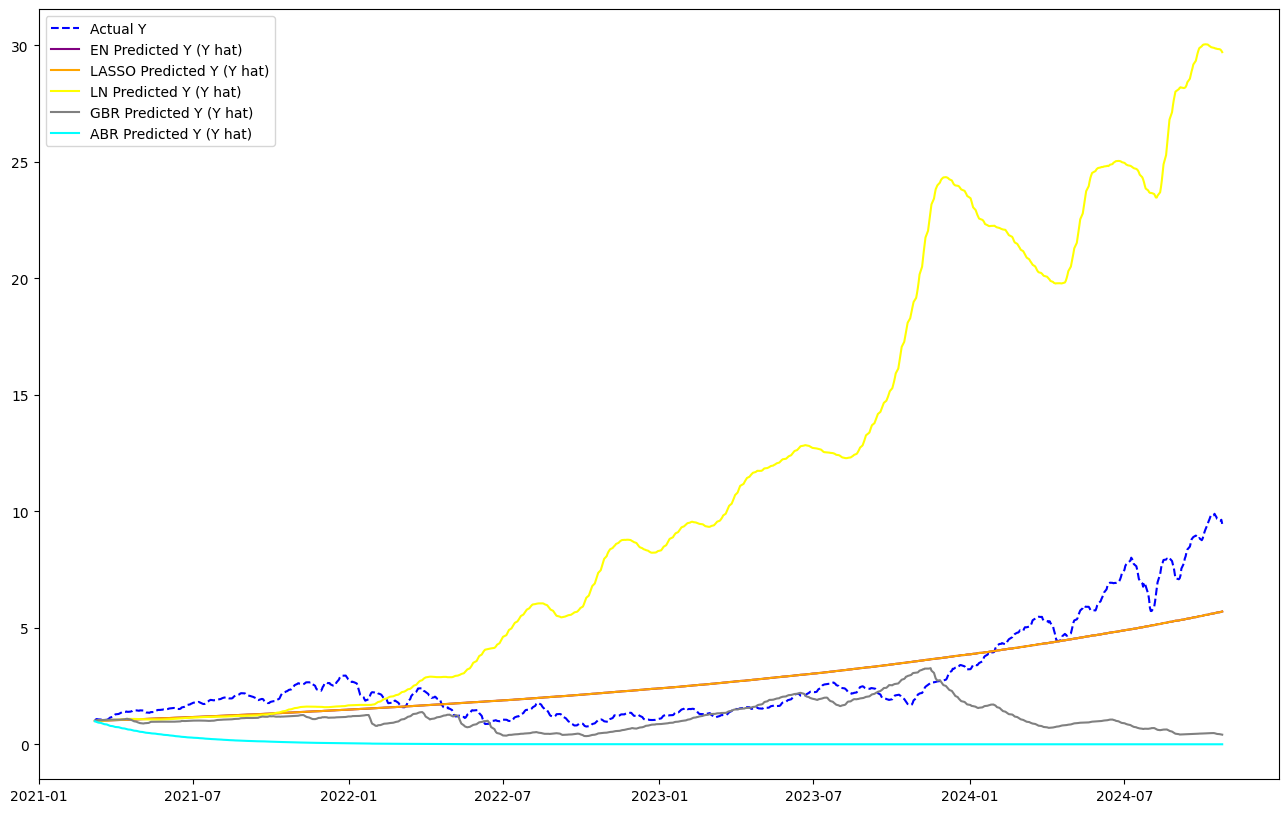

In [45]:
plt\
    .figure(figsize = (16, 10))

LN_Predictions.index = Y_test.index

plt\
    .plot(np.exp(Y_test).cumprod(),
          "b--",
          label = "Actual Y")

# plt\
#     .plot(np.exp(predicted).cumprod(),
#           label = "ARIMA Predicted Y (Y hat)", color = 'red')

# plt\
#     .plot(np.exp(KNN_Predictions).cumprod(),
#           label = "KNN Predicted Y (Y hat)", color = 'green')

plt\
    .plot(np.exp(EN_Predictions).cumprod(),
          label = "EN Predicted Y (Y hat)", color = 'purple')

plt\
    .plot(np.exp(LASSO_Predictions).cumprod(),
          label = "LASSO Predicted Y (Y hat)", color = 'orange')

plt\
    .plot(np.exp(LN_Predictions).cumprod(),
          label = "LN Predicted Y (Y hat)", color = 'yellow')

# plt\
#     .plot(np.exp(RFR_Predictions).cumprod(),
#           label = "RFR Predicted Y (Y hat)", color = 'black')

plt\
    .plot(np.exp(GBR_Predictions).cumprod(),
          label = "GBR Predicted Y (Y hat)", color = 'grey')

# plt\
#     .plot(np.exp(CART_Predictions).cumprod(),
#           label = "CART Predicted Y (Y hat)", color = 'blue')

plt\
    .plot(np.exp(ABR_Predictions).cumprod(),
          label = "ABR Predicted Y (Y hat)", color = 'cyan')

# plt\
#     .plot(np.exp(SVM_Predictions).cumprod(),
#           label = "SVM Predicted Y (Y hat)", color = 'pink')

plt\
    .legend()

plt\
    .show()

In [46]:
capital = 100000

In [47]:
mse = mean_squared_error(Y_test, LN_Predictions[['Predicted']])
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.0005265915254984342


In [48]:
# Actual returns
LN_Predictions['Returns'] = SPY['Adj Close'].pct_change()

# Signal: Use predicted returns to define positions
LN_Predictions['positions'] = np.where(
    LN_Predictions['Predicted'] > 0, 1, -1  # Long for positive prediction, Short for negative
)

In [49]:
# Strategy Returns: Shift positions to prevent lookahead bias
LN_Predictions['strategy_returns'] = LN_Predictions['positions'].shift(1) * LN_Predictions['Returns']

In [50]:
Predictions = LN_Predictions['strategy_returns']

In [52]:
# Drop NaNs introduced by shift
LN_Predictions.dropna(inplace=True)

# Performance Metrics
def calculate_metrics(data):
    # Sharpe Ratio
    sharpe_ratio = data.mean() / data.std() * np.sqrt(252)  # Annualized

    # Maximum Drawdown (MDD)
    cumulative_returns = (1 + data).cumprod()
    peak = cumulative_returns.cummax()
    drawdown = (cumulative_returns - peak) / peak
    max_drawdown = drawdown.min()

    # CAGR
    total_return = cumulative_returns.iloc[-1]
    years = len(data) / 252
    cagr = total_return ** (1 / years) - 1

    return sharpe_ratio, max_drawdown, cagr

# Calculate strategy metrics
strategy_sr, strategy_mdd, strategy_cagr = calculate_metrics(Predictions)

# Print metrics
print(f"Strategy Metrics:\nSharpe Ratio: {strategy_sr:.2f}\nMDD: {strategy_mdd:.2%}\nCAGR: {strategy_cagr:.2%}")

Strategy Metrics:
Sharpe Ratio: 0.76
MDD: -20.89%
CAGR: 11.92%


<Axes: xlabel='Date'>

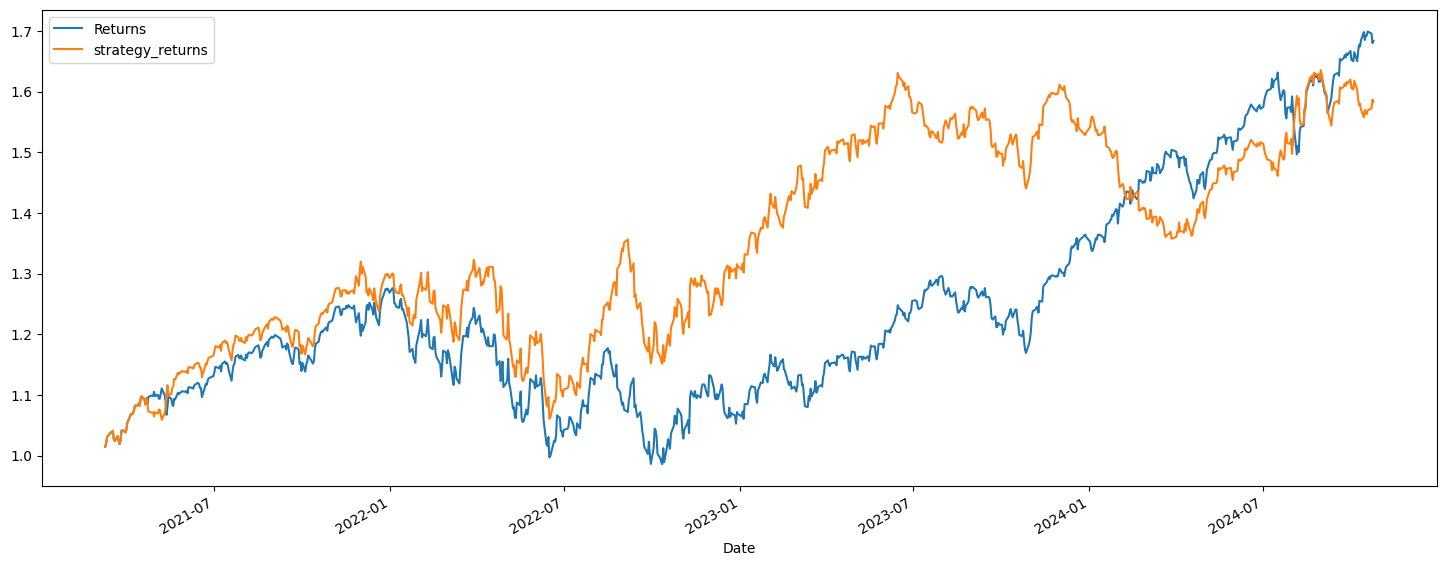

In [53]:
(
    LN_Predictions
    [['Returns','strategy_returns']]
    .ffill()
    .cumsum()
    .apply(np.exp)
    .plot(figsize = [18,7])
)

In [54]:
# Calculate cumulative returns of the strategy
LN_Predictions['strategy_cum_returns'] =\
(
    np
    .exp(LN_Predictions['strategy_returns'].cumsum())
)

# Compute the portfolio value over time
LN_Predictions['Strategy_portfolio_value'] =\
(
    capital 
    * LN_Predictions['strategy_cum_returns']
)

# Calculate cumulative returns of the strategy
LN_Predictions['cum_returns'] =\
(
    np
    .exp(LN_Predictions['Returns'].cumsum())
)

LN_Predictions['SPY_portfolio_value'] =\
(
    capital 
    * LN_Predictions['cum_returns']
)

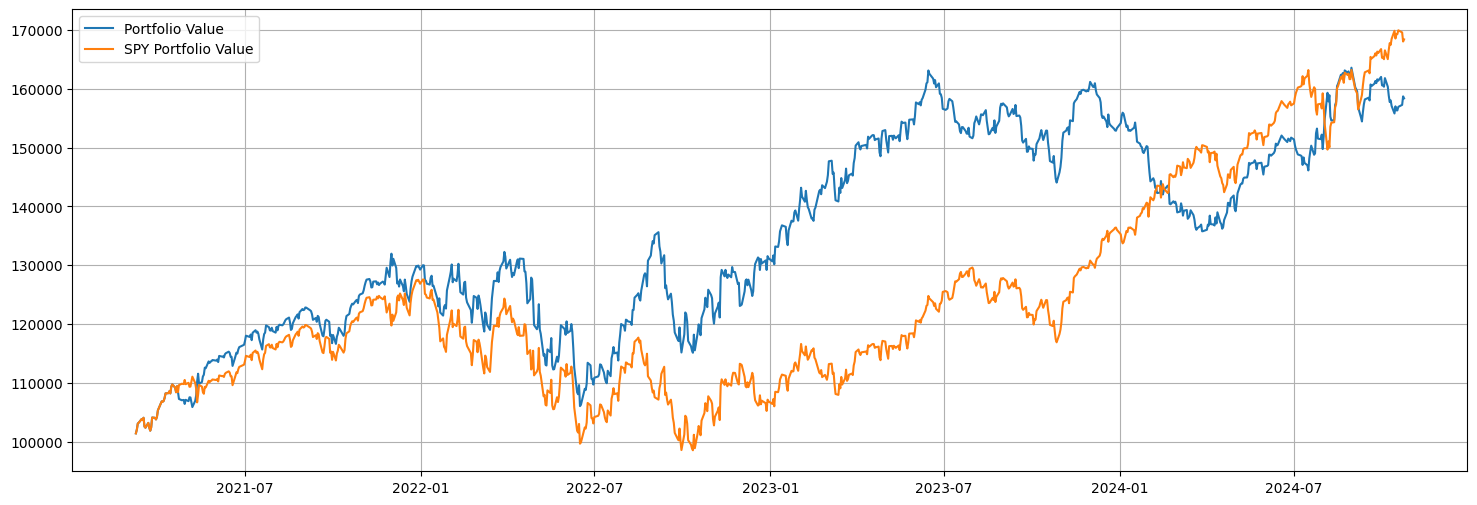

In [55]:
plt\
    .figure(figsize=(18, 6))

plt\
    .plot(LN_Predictions.index, 
          LN_Predictions['Strategy_portfolio_value'], 
          label ='Portfolio Value')

plt\
    .plot(LN_Predictions.index, 
          LN_Predictions['SPY_portfolio_value'], 
          label='SPY Portfolio Value')

plt.legend()

plt.grid()

plt.show()

In [56]:
LN_Predictions[['SPY_portfolio_value', 'Strategy_portfolio_value']]

,SPY_portfolio_value,Strategy_portfolio_value
Date,,
2021-03-09,101437.974094,101437.974094
2021-03-10,102071.367147,102071.367147
2021-03-11,103111.541730,103111.541730
2021-03-12,103250.501744,103250.501744
2021-03-15,103868.081434,103868.081434
...,...,...
2024-10-18,169929.895923,156915.230755
2024-10-21,169651.063670,157173.130862
2024-10-22,169560.976713,157256.636214
